# Import Important Modules 

In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from extract_dataframe import TweetDfExtractor
from extract_dataframe import read_json

_, tweet_list = read_json("../data/Economic_Twitter_Data.json")

# Initialize Extractor Instance and Get Data

In [2]:
tweets_df_extractor = TweetDfExtractor(tweet_list)
tweets_df = tweets_df_extractor.get_tweet_df()

In [3]:
tweets_df.head()

,created_at,source,original_text,clean_text,polarity,subjectivity,sentiment,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,RT @nikitheblogger Irre Annalena Baerbock sagt...,0.0,0.0,neutral,de,113,355,McMc74078966,3,12,None,,nikitheblogger___,None
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,RT @sagt_mit Merkel schaffte es in 1 Jahr 1 Mi...,0.0,0.0,neutral,de,113,505,McMc74078966,3,12,None,,sagt_mit___,None
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,RT @Kryptonoun @WRi007 Pharma in Lebensmitteln...,0.0,0.0,neutral,de,113,4,McMc74078966,3,12,None,,Kryptonoun___WRi007___,None
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,RT @WRi007 Die #Deutschen sind ein braves Volk...,0.0,0.0,neutral,de,113,332,McMc74078966,3,12,None,Deutschen___Spritpreisen___inflation___Abgaben___,WRi007___,None
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,RT @RolandTichy Baerbock verkndet mal so neben...,0.0,0.0,neutral,de,113,386,McMc74078966,3,12,None,,RolandTichy___,None


# Initialize Tweet Data Cleaner

In [4]:
from clean_tweets_dataframe import Clean_Tweets
clean_tweets = Clean_Tweets(tweets_df)

Automation in Action...!!!


# Drop Duplicates

In [5]:
tweets_df = clean_tweets.drop_duplicate(tweets_df)
tweets_df.shape

(24625, 17)

# Remove Non English

In [6]:
tweets_df = clean_tweets.remove_non_english_tweets(tweets_df)
tweets_df.shape

(16472, 17)

In [7]:
tweets_df.isna().sum()

created_at                0
source                    0
original_text             0
clean_text                0
polarity                  0
subjectivity              0
sentiment                 0
lang                      0
favorite_count            0
retweet_count             0
original_author           0
followers_count           0
friends_count             0
possibly_sensitive    10266
hashtags                  0
user_mentions             0
place                  5707
dtype: int64

# Handle Missing Data

In [8]:
tweets_df['possibly_sensitive'] = tweets_df['possibly_sensitive'].fillna("not_found")
tweets_df['place'] = tweets_df['place'].fillna("not_known")
tweets_df.isna().sum()

created_at            0
source                0
original_text         0
clean_text            0
polarity              0
subjectivity          0
sentiment             0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

# Remove Unwanted Characters

In [9]:
tweets_df = clean_tweets.remove_place_characters(tweets_df)
tweets_df.isna().sum()

created_at            0
source                0
original_text         0
clean_text            0
polarity              0
subjectivity          0
sentiment             0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

In [10]:
tweets_df['place'] = tweets_df['place'].fillna("not_known")
tweets_df.isna().sum()

created_at            0
source                0
original_text         0
clean_text            0
polarity              0
subjectivity          0
sentiment             0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

# Convert Date Time

In [11]:
tweets_df = clean_tweets.convert_to_datetime(tweets_df)
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16374 entries, 38 to 24622
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          16374 non-null  datetime64[ns, UTC]
 1   source              16374 non-null  object             
 2   original_text       16374 non-null  object             
 3   clean_text          16374 non-null  object             
 4   polarity            16374 non-null  float64            
 5   subjectivity        16374 non-null  float64            
 6   sentiment           16374 non-null  object             
 7   lang                16374 non-null  object             
 8   favorite_count      16374 non-null  int64              
 9   retweet_count       16374 non-null  int64              
 10  original_author     16374 non-null  object             
 11  followers_count     16374 non-null  int64              
 12  friends_count       16374 non-n

# Clean Sorce Device Data

In [12]:
import re
tweets_df["source"] = tweets_df["source"].apply(clean_tweets.extract_twitter_source)
tweets_df.head()

,created_at,source,original_text,clean_text,polarity,subjectivity,sentiment,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
38,2022-04-22 22:17:05+00:00,Twitter for Android,RT @NorthstarCharts: The 10-year yield is tell...,RT @NorthstarCharts The 10year yield is tellin...,0.16,0.540000,positive,en,12179,43,davideiacovozzi,18,55,not_found,gold___silver___crypto___,NorthstarCharts___,not_known
39,2022-04-22 13:44:53+00:00,Twitter for Android,RT @MichaelAArouet: German 10y mortgage rate w...,RT @MichaelAArouet German 10y mortgage rate we...,0.15,0.175000,positive,en,12179,32,davideiacovozzi,18,55,not_found,,MichaelAArouet___,not_known
41,2022-04-22 06:10:34+00:00,Twitter for Android,RT @goldseek: When? https://t.co/kO2FfHKaZg,RT @goldseek When httpstcokO2FfHKaZg,0.00,0.000000,neutral,en,12179,26,davideiacovozzi,18,55,False,,goldseek___,not_known
42,2022-04-21 17:22:09+00:00,Twitter for Android,RT @charliebilello: The 30-year mortgage rate ...,RT @charliebilello The 30year mortgage rate in...,0.00,0.183333,neutral,en,12179,213,davideiacovozzi,18,55,not_found,,charliebilello___,not_known
43,2022-04-21 10:32:26+00:00,Twitter for Android,RT @biancoresearch: Rates rise until something...,RT @biancoresearch Rates rise until something ...,-0.40,0.400000,negative,en,12179,417,davideiacovozzi,18,55,False,,biancoresearch___,not_known


# Save pre processing data

In [13]:
tweets_df.to_csv("../data/processed_data_tweets.csv", index=False)

# Data Exploration

In [15]:
tweets_df = pd.read_csv("../data/processed_data_tweets.csv")
tweets_df.head()

,created_at,source,original_text,clean_text,polarity,subjectivity,sentiment,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-04-22 22:17:05+00:00,Twitter for Android,RT @NorthstarCharts: The 10-year yield is tell...,RT @NorthstarCharts The 10year yield is tellin...,0.16,0.540000,positive,en,12179,43,davideiacovozzi,18,55,not_found,gold___silver___crypto___,NorthstarCharts___,not_known
1,2022-04-22 13:44:53+00:00,Twitter for Android,RT @MichaelAArouet: German 10y mortgage rate w...,RT @MichaelAArouet German 10y mortgage rate we...,0.15,0.175000,positive,en,12179,32,davideiacovozzi,18,55,not_found,,MichaelAArouet___,not_known
2,2022-04-22 06:10:34+00:00,Twitter for Android,RT @goldseek: When? https://t.co/kO2FfHKaZg,RT @goldseek When httpstcokO2FfHKaZg,0.00,0.000000,neutral,en,12179,26,davideiacovozzi,18,55,False,,goldseek___,not_known
3,2022-04-21 17:22:09+00:00,Twitter for Android,RT @charliebilello: The 30-year mortgage rate ...,RT @charliebilello The 30year mortgage rate in...,0.00,0.183333,neutral,en,12179,213,davideiacovozzi,18,55,not_found,,charliebilello___,not_known
4,2022-04-21 10:32:26+00:00,Twitter for Android,RT @biancoresearch: Rates rise until something...,RT @biancoresearch Rates rise until something ...,-0.40,0.400000,negative,en,12179,417,davideiacovozzi,18,55,False,,biancoresearch___,not_known


In [16]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16374 entries, 0 to 16373
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          16374 non-null  object 
 1   source              16374 non-null  object 
 2   original_text       16374 non-null  object 
 3   clean_text          16374 non-null  object 
 4   polarity            16374 non-null  float64
 5   subjectivity        16374 non-null  float64
 6   sentiment           16374 non-null  object 
 7   lang                16374 non-null  object 
 8   favorite_count      16374 non-null  int64  
 9   retweet_count       16374 non-null  int64  
 10  original_author     16374 non-null  object 
 11  followers_count     16374 non-null  int64  
 12  friends_count       16374 non-null  int64  
 13  possibly_sensitive  16374 non-null  object 
 14  hashtags            16374 non-null  object 
 15  user_mentions       16374 non-null  object 
 16  plac

In [17]:
tweets_df.isna().sum()

created_at             0
source                 0
original_text          0
clean_text             0
polarity               0
subjectivity           0
sentiment              0
lang                   0
favorite_count         0
retweet_count          0
original_author        0
followers_count        0
friends_count          0
possibly_sensitive     0
hashtags               0
user_mentions          0
place                 13
dtype: int64

# Source Plot

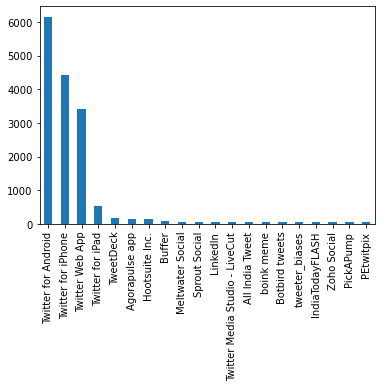

In [18]:
tweets_df["source"].value_counts().head(20).plot(kind="bar");

# Retweet Count Plot

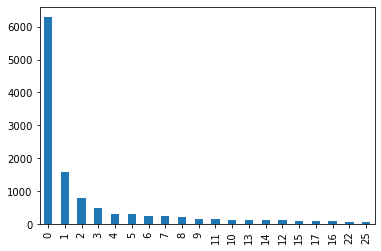

In [19]:
tweets_df['retweet_count'].value_counts().head(20).plot(kind="bar")

# Original Author Plot

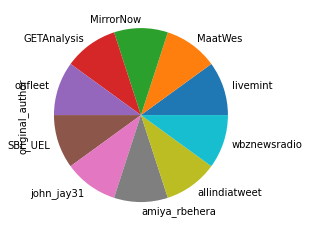

In [20]:
tweets_df['original_author'].value_counts().head(10).plot(kind="pie");

# Place Plot

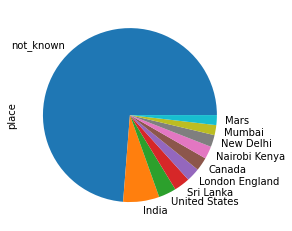

In [21]:
tweets_df['place'].value_counts().head(10).plot(kind="pie");

# Sentiment Plot

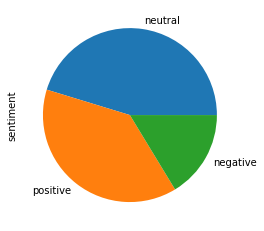

In [22]:
tweets_df["sentiment"].value_counts().head(20).plot(kind="pie");

In [23]:
tweets_df["sentiment"].value_counts()

neutral     7414
positive    6289
negative    2671
Name: sentiment, dtype: int64

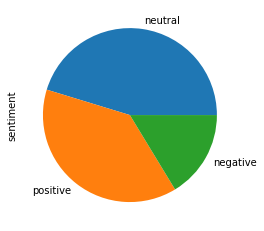

In [24]:
tweets_df["sentiment"].value_counts().plot(kind="pie");

# Hashtags plot

In [25]:

hashtags =[]
for hashtag_list in tweets_df['hashtags']:
    hashtag_list = hashtag_list.split("___")
    for hashtag in hashtag_list:
        if hashtag != " " and hashtag != "":
            hashtags.append(hashtag)
hashtag_df = pd.DataFrame(hashtags, columns=['hashtags'])
# hashtag_df.head()
hashtag_df['hashtags'].value_counts()

MarvinInu          332
inflation          184
Ukraine            121
gold               113
Marvin             111
                  ... 
Sweden               1
goinggreen           1
HorsinAround         1
MKStalin4PM2024      1
transportation       1
Name: hashtags, Length: 4063, dtype: int64

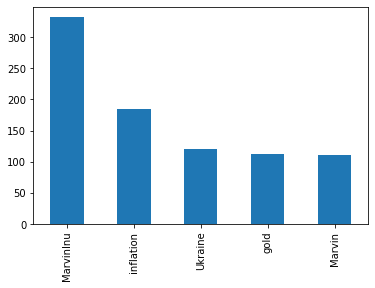

In [26]:
hashtag_df['hashtags'].value_counts().head().plot(kind="bar");

# User Mentions Plot 

In [27]:
user_mentions=[]
for user_mention_list in tweets_df['user_mentions']:
    user_mention_list = user_mention_list.split("___")
    for user_mention in user_mention_list:
        if user_mention != " " and user_mention != "":
            user_mentions.append(user_mention)
user_mention_df = pd.DataFrame(user_mentions, columns=['user_mentions'])
# hashtag_df.head()
user_mention_df['user_mentions'].value_counts()

AITCofficial       327
MamataOfficial     238
Marvin_Inu         233
_                  194
ETPrime_com        175
                  ... 
WealthfulMind        1
Craftmastah          1
PeterLBrandt         1
MinerDeck            1
kenklippenstein      1
Name: user_mentions, Length: 8023, dtype: int64

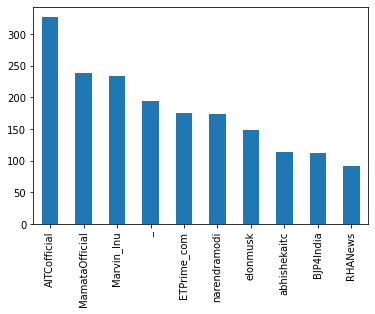

In [28]:
user_mention_df['user_mentions'].value_counts().head(10).plot(kind="bar");